# Load libraries and data

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [2]:
test.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [3]:
sample_submission.head()

,id,Calories
0,750000,88.283
1,750001,88.283
2,750002,88.283
3,750003,88.283
4,750004,88.283


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          250000 non-null  int64  
 1   Sex         250000 non-null  object 
 2   Age         250000 non-null  int64  
 3   Height      250000 non-null  float64
 4   Weight      250000 non-null  float64
 5   Duration    250000 non-null  float64
 6   Heart_Rate  250000 non-null  float64
 7   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [6]:
train.describe(include='all')

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,375721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,374999.500000,NaN,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,NaN,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,NaN,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,NaN,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,NaN,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,NaN,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000


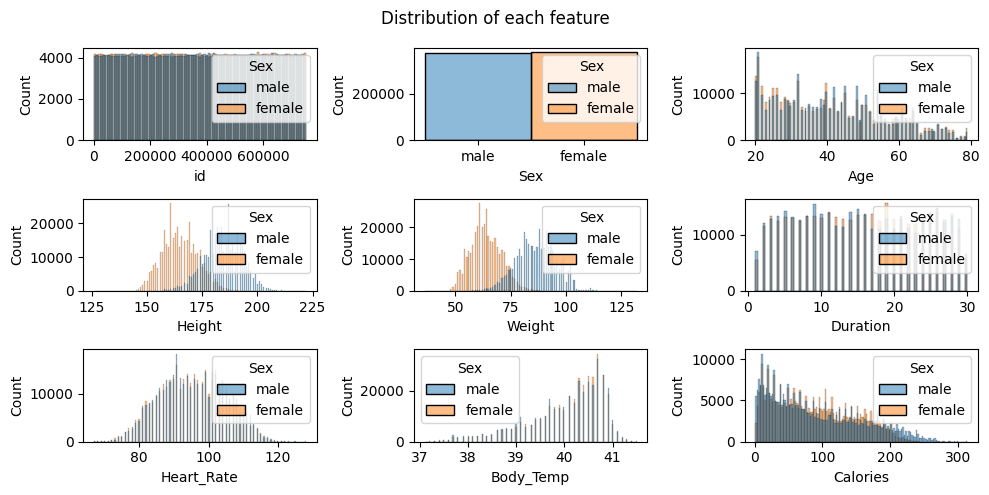

In [22]:
fig, ax = plt.subplots(3,3, figsize=(10,5), tight_layout=True)
ax = ax.flatten()

for i, feature in enumerate(train.columns):
    sns.histplot(data=train, x=feature, ax=ax[i], hue='Sex')

plt.suptitle('Distribution of each feature')
plt.show()


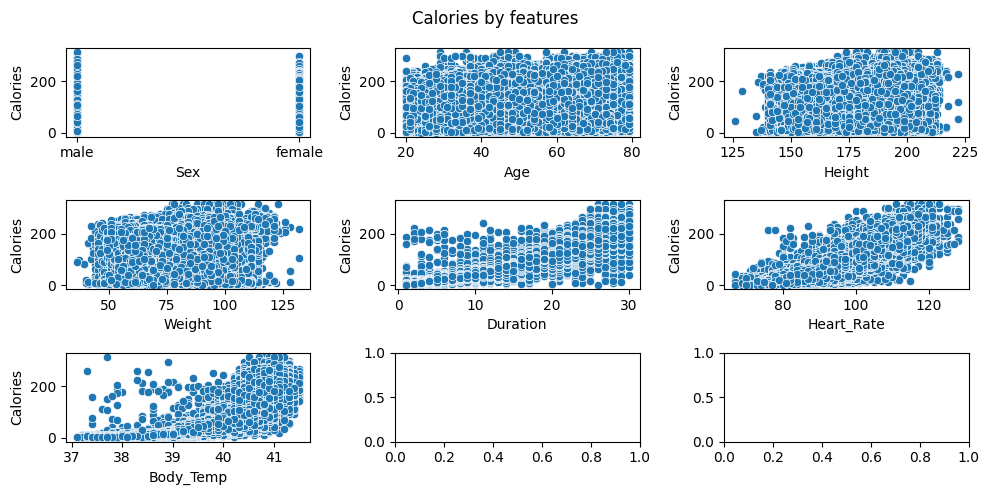

In [20]:
fig, ax = plt.subplots(3,3, figsize=(10,5), tight_layout=True)
ax = ax.flatten()

for i, feature in enumerate(train.drop(['id', 'Calories'], axis=1).columns):
    sns.scatterplot(data=train, x=feature, y='Calories', ax=ax[i])

plt.suptitle('Calories by features')
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

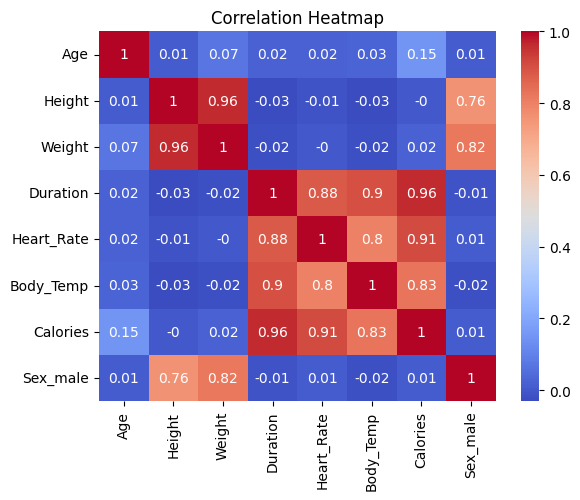

In [18]:
train_dummies = pd.get_dummies(train.drop('id', axis=1), drop_first=True)
sns.heatmap(train_dummies.corr().round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')